# Soal nomor 2, 2502041956 - Nicholas Javier - LA05
# Link Video : https://www.youtube.com/watch?v=yF9EqOwTXt0

2. [LO1, LO2, LO3] Di tahun 2023 terjadi kasus BSI yang mengalami serangan Ransomware, sehingga
menggangu fungsi Bank ini secara nasional. Pengguna twitter (X) banyak mengunggah tweet
memberikan respon terhadap kasus ini. Penasaran dengan apa saja yang dibicarakan user mengenai
kasus ini di twitter (X), anda diminta melakukan pemodelan terhadap data kumpulan tweet pengguna
dengan detail sebagai berikut:


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import nltk

In [7]:
df = pd.read_csv('data_2C.csv')
tweets = df['Tweet']
df.head(4)

,Unnamed: 0,index,URL,Date,Tweet,ID,Username,Replies,Reetweets,Likes,Quotes,conversationId,Language,Links,Media,Retweeted Tweet,Bookmarks
0,0,6881,https://twitter.com/koesmanagalang/status/1657...,2023-05-13 17:02:16+00:00,@myrnn_ @secgron @bankbsi_id sistem sama orang...,1657431076921544705,koesmanagalang,1,0,0,0,1657192354829451264,in,NaN,NaN,NaN,0
1,1,9209,https://twitter.com/muhammad_dlya/status/16572...,2023-05-13 07:14:32+00:00,@setyodiwantoro @ZakyFarid @RochmatPurwanto @b...,1657283168054181888,muhammad_dlya,1,0,0,0,1657217322447425538,eu,NaN,NaN,NaN,0
2,2,13665,https://twitter.com/NuriSeptiyani/status/16566...,2023-05-11 13:40:46+00:00,@Kebosananan @detikcom iya nasabah bank konven...,1656655591488761857,NuriSeptiyani,2,0,1,1,1656576231545131008,in,NaN,NaN,NaN,0
3,3,17281,https://twitter.com/MasYusuf_/status/165646539...,2023-05-11 01:04:59+00:00,@bankbsi_id Gimana sih Min ini kok gak bisa la...,1656465393014419456,MasYusuf_,1,0,1,0,1655807602104872960,in,NaN,NaN,NaN,0


In [11]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(filtered_tokens)

df['processed_tweet'] = df['Tweet'].apply(preprocess_tweet)

df.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,index,URL,Date,Tweet,ID,Username,Replies,Reetweets,Likes,Quotes,conversationId,Language,Links,Media,Retweeted Tweet,Bookmarks,processed_tweet
0,0,6881,https://twitter.com/koesmanagalang/status/1657...,2023-05-13 17:02:16+00:00,@myrnn_ @secgron @bankbsi_id sistem sama orang...,1657431076921544705,koesmanagalang,1,0,0,0,1657192354829451264,in,NaN,NaN,NaN,0,sistem sama orangnya harus di ganti gak ada si...
1,1,9209,https://twitter.com/muhammad_dlya/status/16572...,2023-05-13 07:14:32+00:00,@setyodiwantoro @ZakyFarid @RochmatPurwanto @b...,1657283168054181888,muhammad_dlya,1,0,0,0,1657217322447425538,eu,NaN,NaN,NaN,0,gak gitu
2,2,13665,https://twitter.com/NuriSeptiyani/status/16566...,2023-05-11 13:40:46+00:00,@Kebosananan @detikcom iya nasabah bank konven...,1656655591488761857,NuriSeptiyani,2,0,1,1,1656576231545131008,in,NaN,NaN,NaN,0,iya nasabah bank konven sprti bribnimandiri di...


In [13]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_tweet'])
X.shape

(6100, 9863)

a. Lakukan pengelompokan dengan menggunakan pendekatan clustering, silahkan ujicoba
beberapa nilai cluster (k) yang mungkin anda peroleh dari data tersebut, berikan perbandingan
silhoutte score sebagai justifikasi jumlah cluster (k) yang akan anda pilih.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870:

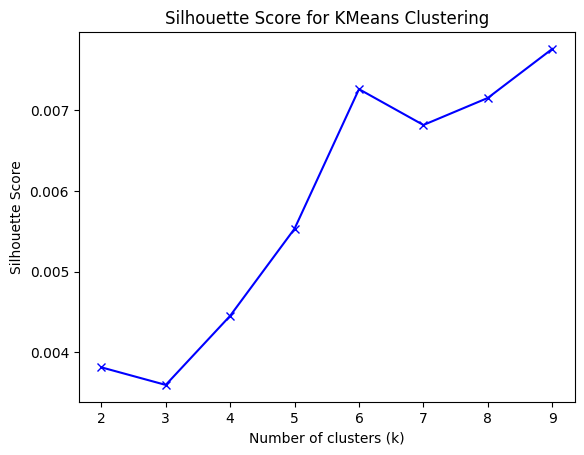

Best cluster: 9


In [9]:

silhouette_scores = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.show()

best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Best cluster: {best_k}')

Pada model KMeans Clustering, skor Silhouette menunjukkan seberapa mirip titik data dalam klaster yang sama dengan klaster lain, seperti yang ditunjukkan pada grafik berikut. Nilai Silhouette Score berkorelasi positif dengan kualitas clustering yang dihasilkan.

Dari grafik tersebut, Silhouette Score meningkat secara signifikan dari k=4 hingga k=6, dengan skor tertinggi pada k=6. Peningkatan ini menunjukkan bahwa model KMeans menghasilkan klaster yang lebih baik ketika k=6 dibandingkan dengan jumlah klaster lainnya. Namun, peningkatan tidak sejelas dari k=4 hingga k=6, dan k=8 dan k=9 menunjukkan peningkatan yang lebih kecil. Oleh karena itu, k=6 tampaknya menjadi juara untuk model KMeans.

Penggunaan k=6 sebagai jumlah klaster terbaik menunjukkan bahwa data yang dianalisis telah dikelompokkan menjadi enam klaster terpisah, yang memungkinkan pemahaman yang lebih baik tentang data dan segmentasi yang lebih jelas. Penggunaan k=6 akan memberikan pemisahan terbaik, yang membantu dalam interpretasi dan analisis lebih lanjut dari hasil kelompokkan.

b. Lakukan persona analysis untuk cluster yang anda hasilkan, jelaskan informasi yang anda
peroleh mengenai cluster tersebut berdasarkan personanya.

In [26]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

for cluster_num in range(best_k):
    cluster_tweets = df[df['Cluster'] == cluster_num]['processed_tweet']
    print(f"\nCluster {cluster_num}:")
    print(cluster_tweets.head(12))


Cluster 0:
31    ada yang transfer dari hari senin sampai sekar...
42                                         udah hari ke
46    mau transfer ke bank lain dari bsi udh aman bl...
50    halo admin saya pagi ini top sudah klik ok mal...
57    saya terakhir ke bsi customer service nya masi...
60    iyaa kak sama saya juga tranfer ke bri lewat m...
65    nah ini yg menarik di twit awal saya saya tuli...
69    dari hari jumat tanggal mei tf bsi mandiri den...
71    sdh hari saya ngga bisa pakai mobile banking b...
74    di aku msh ke menu saldo tiap ngeklik qris ata...
79    saya pernah rb dan bodohnya masih ga percaya k...
87    kirain internet saya yg bermasalah gara gabisa...
Name: processed_tweet, dtype: object

Cluster 1:
4                              bca sy bisa nih kayaknya
5     normal apaan semalem mo tarik tunai masih nga ...
25                        kok bisa malah suruh pinjeemm
36       nahh gak bisaa wkwkwk sabar ya top aja gk bisa
44    parah banget gak bisa dipake sampe se

In [4]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

from collections import Counter

def get_top_keywords(data, clusters, vectorizer, n_terms=10):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean()
    terms = vectorizer.get_feature_names_out()
    top_keywords = {}
    for i, row in df.iterrows():
        top_keywords[i] = [terms[t] for t in row.argsort()[-n_terms:]]
    return top_keywords

top_keywords = get_top_keywords(df['processed_tweet'], df['cluster'], vectorizer)

for cluster, keywords in top_keywords.items():
    print(f'Cluster {cluster}: {keywords}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: ['bisa', 'saldo', 'transfer', 'masuk', 'di', 'lain', 'bank', 'bsi', 'saya', 'ke']
Cluster 1: ['cek', 'di', 'min', 'masih', 'atm', 'udah', 'gak', 'blm', 'ga', 'bisa']
Cluster 2: ['ya', 'dan', 'yang', 'syariah', 'yg', 'ada', 'ini', 'di', 'bank', 'bsi']
Cluster 3: ['kalo', 'hati', 'ke', 'belum', 'aku', 'udah', 'coba', 'aja', 'bisa', 'kak']
Cluster 4: ['baca', 'bales', 'ya', 'admin', 'dong', 'saya', 'tolong', 'min', 'cek', 'dm']
Cluster 5: ['sampai', 'bsi', 'ya', 'mobile', 'transfer', 'ini', 'min', 'masih', 'bisa', 'belum']
Cluster 6: ['masih', 'sampai', 'bsi', 'sampe', 'lagi', 'hari', 'error', 'min', 'ini', 'kapan']
Cluster 7: ['ke', 'atm', 'bsi', 'mbanking', 'hari', 'ya', 'ini', 'mau', 'min', 'gabisa']
Cluster 8: ['udh', 'kalau', 'urgent', 'terus', 'cek', 'atm', 'berkala', 'bisa', 'coba', 'ka']


### Analisis Klaster Berdasarkan Personanya (Ringkas):

**Cluster 0:**
- **Persona:** Pengguna mengalami masalah transfer antar bank.
- **Informasi:** Kesulitan transfer dari BSI ke bank lain, frustasi karena masalah belum terselesaikan.

**Cluster 1:**
- **Persona:** Pengguna mengalami masalah dengan ATM dan transaksi tunai.
- **Informasi:** Kesulitan menggunakan ATM BSI, bertanya kapan ATM berfungsi normal.

**Cluster 2:**
- **Persona:** Pengguna marah dan frustasi dengan masalah sistem BSI.
- **Informasi:** Keluhan sistem sering error, ketidakpuasan dengan layanan BSI, keinginan pindah bank.

**Cluster 3:**
- **Persona:** Pengguna mencari informasi pemulihan mobile banking.
- **Informasi:** Bertanya kapan layanan pulih, disarankan cek berkala.

**Cluster 4:**
- **Persona:** Pengguna meminta bantuan melalui DM.
- **Informasi:** Meminta admin cek DM untuk solusi personal.

**Cluster 5:**
- **Persona:** Pengguna melaporkan masalah mobile banking berlanjut.
- **Informasi:** Belum bisa transaksi, transfer, top-up, frustasi dengan durasi masalah.

**Cluster 6:**
- **Persona:** Pengguna ingin penjelasan dan solusi cepat.
- **Informasi:** Menanyakan penyelesaian masalah, berharap perbaikan segera.

**Cluster 7:**
- **Persona:** Pengguna mengalami masalah umum dengan mobile banking.
- **Informasi:** Tidak bisa transaksi, transfer, cek saldo, keluhan masalah lama.

**Cluster 8:**
- **Persona:** Pengguna memberikan saran dan info pemulihan layanan.
- **Informasi:** Berbagi info pemulihan, saran alternatif menggunakan ATM, cek berkala.

C. Anda tertarik untuk membandingkan hasil clustering dengan metode lain yaitu topic
extraction, sehingga anda perlu melakukan pemodelan topic extraction. Jelaskan metode topic
extraction yang anda lakukan

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=best_k, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=9, random_state=42)

Pustaka sklearn digunakan untuk menerapkan analisis topik dalam kode yang diberikan. Model Latent Dirichlet Allocation (LDA) adalah metode pemodelan topik yang menganggap setiap dokumen sebagai campuran dari beberapa topik, dengan n_components=best_k menunjukkan jumlah topik yang diperkirakan ideal (best_k) yang diinginkan untuk ditentukan dalam analisis. Selanjutnya, model dilatih dengan data masukan dari X. Untuk memastikan bahwa hasilnya dapat diulang dalam kondisi yang sama, kondisi random disetel ke 42. Tujuan dari proses ini adalah untuk menemukan struktur topik yang tersembunyi dalam koleksi dokumen yang diberikan kepada Anda.

In [22]:
df['Topic'] = lda.transform(X).argmax(axis=1)

for topic_num in range(8):
    topic_tweets = df[df['Topic'] == topic_num]['processed_tweet']
    print(f"\nTopic {topic_num}:")
    print(topic_tweets.head(12))

    topic_words = lda.components_[topic_num]
    top_words_indices = topic_words.argsort()[-10:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    print(f"Top words: {top_words}")


Topic 0:
6      wes bener bener dadi kampus obama malah dadi b...
20     ahjangan mengadingadi sampean minga bisadari t...
54                wani ne akun palsu koment di akun real
134                                               wanjer
161    gua gak bisa transfer weiiii kapan betulnya si...
184                     ada pernyataan resmi dari mereka
204    klo hanya liat ui bsi oke banget sih dibanding...
216    apakah mungkin dibalik semua ini ada persainga...
257    hallloo dari bunga mayang lampung utara berapa...
313             saran ku kalau urgent bgt bisa ke atm ka
330    bukan masalah pindah bank atau ga nya ingat na...
348    ka saranku kalau urgent bisa cek di atm ka ata...
Name: processed_tweet, dtype: object
Top words: ['kalau', 'hubungi', 'ke', 'coba', 'urgent', 'center', 'terdekat', 'call', 'kc', 'ka']

Topic 1:
8      mau sampe kapan klen error tiap jam ku pantau ...
13     hai sobatrupiah sebelumnya kami turut bersimpa...
33                                      memaluk

In [23]:
for topic_num in range(8):
    topic_words = lda.components_[topic_num]
    top_words_indices = topic_words.argsort()[-10:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    print(f"Top words: {top_words}")

Top words: ['kalau', 'hubungi', 'ke', 'coba', 'urgent', 'center', 'terdekat', 'call', 'kc', 'ka']
Top words: ['serangan', 'lockbit', 'dan', 'yang', 'nasabah', 'data', 'syariah', 'bsi', 'bank', 'indonesia']
Top words: ['perbaiki', 'yang', 'sm', 'bsi', 'yg', 'ada', 'bank', 'alhamdulillah', 'parah', 'penipu']
Top words: ['lu', 'ziva', 'selasa', 'lockbit', 'nabila', 'milikmu', 'bsi', 'ipk', 'khairunnisa', 'bank']
Top words: ['syariah', 'ya', 'ada', 'nya', 'itu', 'ini', 'yg', 'di', 'bsi', 'bank']
Top words: ['yg', 'serem', 'ke', 'kena', 'wkwkwk', 'ya', 'nunggu', 'ngeri', 'bsi', 'iya']
Top words: ['bank', 'jugaaa', 'samaaa', 'bulan', 'tipu', 'jelek', 'itu', 'april', 'bye', 'bang']
Top words: ['ke', 'udah', 'ya', 'di', 'min', 'masih', 'belum', 'ini', 'bsi', 'bisa']


### Analisis Persona Berdasarkan Topic Extraction (Ringkas)

**Topic 0:**
- **Persona:** Pemberi saran dan pencari solusi.
- **Informasi:** Sarankan penggunaan ATM jika mobile banking bermasalah.

**Topic 1:**
- **Persona:** Khawatir serangan siber.
- **Informasi:** Diskusi tentang serangan siber dan kebocoran data nasabah.

**Topic 2:**
- **Persona:** Tidak puas dengan layanan.
- **Informasi:** Keluhan tentang layanan buruk dan kredibilitas bank.

**Topic 3:**
- **Persona:** Bingung dengan masalah teknis.
- **Informasi:** Meminta klarifikasi masalah sistem dan aplikasi.

**Topic 4:**
- **Persona:** Marah dengan manajemen.
- **Informasi:** Komentar negatif tentang manajemen dan kekhawatiran data nasabah.

**Topic 5:**
- **Persona:** Frustrasi dengan pelayanan pelanggan.
- **Informasi:** Keluhan tentang customer service dan sistem tidak efisien.

**Topic 6:**
- **Persona:** Menganggap bank buruk.
- **Informasi:** Komentar negatif tentang kualitas layanan BSI.

**Topic 7:**
- **Persona:** Mengeluh tentang mobile banking.
- **Informasi:** Keluhan tentang mobile banking yang bermasalah dan belum terselesaikan.

d. Lakukan persona analysis kembali untuk topik yang anda peroleh, bandingkan apa yang
anda peroleh dari pendekatan clustering dan topic extraction. Paparkan hal-hal menarik yang
berhasil anda ekstrak

In [25]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

for cluster_num in range(best_k):
    cluster_tweets = df[df['Cluster'] == cluster_num]['processed_tweet']
    print(f"\nCluster {cluster_num}:")
    print(cluster_tweets.head(12))

df['Topic'] = lda.transform(X).argmax(axis=1)

for topic_num in range(8):
    topic_tweets = df[df['Topic'] == topic_num]['processed_tweet']
    print(f"\nTopic {topic_num}:")
    print(topic_tweets.head(12))


Cluster 0:
31    ada yang transfer dari hari senin sampai sekar...
42                                         udah hari ke
46    mau transfer ke bank lain dari bsi udh aman bl...
50    halo admin saya pagi ini top sudah klik ok mal...
57    saya terakhir ke bsi customer service nya masi...
60    iyaa kak sama saya juga tranfer ke bri lewat m...
65    nah ini yg menarik di twit awal saya saya tuli...
69    dari hari jumat tanggal mei tf bsi mandiri den...
71    sdh hari saya ngga bisa pakai mobile banking b...
74    di aku msh ke menu saldo tiap ngeklik qris ata...
79    saya pernah rb dan bodohnya masih ga percaya k...
87    kirain internet saya yg bermasalah gara gabisa...
Name: processed_tweet, dtype: object

Cluster 1:
4                              bca sy bisa nih kayaknya
5     normal apaan semalem mo tarik tunai masih nga ...
25                        kok bisa malah suruh pinjeemm
36       nahh gak bisaa wkwkwk sabar ya top aja gk bisa
44    parah banget gak bisa dipake sampe se

Kesamaan Persona: Masalah utama pengguna seperti transfer antar bank, masalah dengan mobile banking, dan kekhawatiran tentang serangan siber diidentifikasi melalui clustering dan topic extraction.

Kekhususan Topik: Clustering menyatukan tweet berdasarkan keluhan atau masalah yang sama.

Tema-tema tertentu seperti serangan siber, solusi, dan komentar manajemen biasanya menjadi fokus dari Topic Extraction.

Tambahan informasi tentang topik ekstraksi: Topik 1 membahas kekhawatiran tentang serangan siber dan kebocoran data, yang tidak begitu jelas terlihat dalam clustering. Topik 0 memberikan rekomendasi praktis seperti menggunakan ATM, yang tidak muncul sebagai kelompok terpisah dalam clustering.

Ekstraksi Informasi Berharga: Clustering memberikan gambaran umum tentang jenis keluhan utama, tetapi kurang spesifik dalam mengidentifikasi tema tertentu. Topic Extraction memungkinkan identifikasi topik-topik spesifik seperti rekomendasi tentang penggunaan ATM dan diskusi tentang serangan siber, memberikan wawasan yang lebih terfokus.


**Kesimpulan**: Clustering metode memberikan gambaran umum tentang kelompok keluhan utama pengguna, sedangkan topic extraction dengan LDA memberikan pemahaman yang lebih rinci dan spesifik tentang masalah yang dihadapi pengguna dalam keluhan mereka. Kombinasi kedua metode ini dapat membantu memberikan pemahaman yang lebih baik tentang masalah yang dihadapi pengguna dan cara mereka menyampaikan keluhan mereka.